In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [198]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.reset_option("all")
above = '../../../'

In [199]:
# data = pd.read_pickle(above + 'post_eda.pkl')
data = pd.read_pickle(above + 'd_PCmd.pkl')

In [200]:
# del data['s_bbl']
# del data['s_sale_date']
# del data['v_longitude']
# del data['v_latitude']
# data = data[data['s_total_units']<4]

In [201]:
data2 = data.copy()

In [204]:
#data.drop('s_bbl', axis=1,inplace = True)
#data.drop('s_total_units', axis=1,inplace = True)

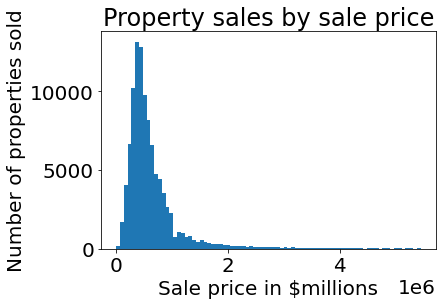

In [205]:
# Sales price histogram
plt.hist(data['s_sale_price'], bins=80, range=(0, np.percentile(data['s_sale_price'],99)))
plt.title('Property sales by sale price')
plt.xlabel('Sale price in $millions')
plt.ylabel('Number of properties sold')
plt.show()

In [206]:
plt.scatter(data['s_total_units'], data['s_sale_price'], s=3)
plt.xlabel('Number of units in property')
plt.ylabel('Property Sale Price')
plt.title('Property Sale Price vs Units in Property')
plt.show()

KeyError: 's_total_units'

In [207]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
# data_minusbbl = data.drop(columns = ['s_bbl'])
Y = data.loc[:, data.columns == 's_sale_price']
X = data.loc[:, data.columns != 's_sale_price']
scaler.fit(X)
scaled_data = scaler.transform(X)
dtr = dtr.fit(scaled_data, Y)

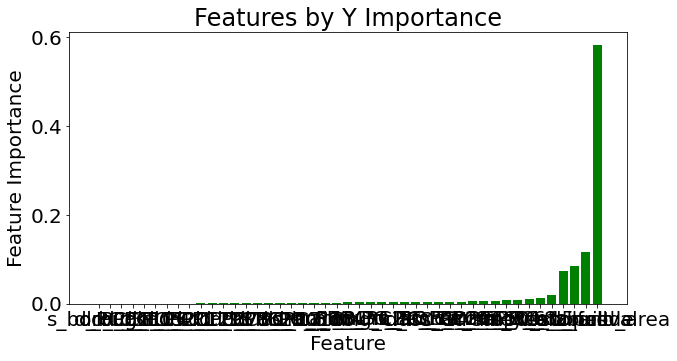

In [208]:
feat_imp = dtr.feature_importances_
X_labels = X.columns
feat_imp_df = pd.DataFrame(zip(X_labels,feat_imp))
sorted_df = feat_imp_df.sort_values(1)
x_pos = np.arange(len(X_labels))
plt.figure(figsize=(10, 5))
plt.bar(x_pos, sorted_df[1],color='green')
plt.xticks(x_pos, sorted_df[0])
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Features by Y Importance')
plt.show()

In [209]:
# Table of feature importances
sorted_df

,0,1
0,s_borough,0.000009
27,d_PC_3,0.000252
35,d_PC_11,0.000328
34,d_PC_10,0.000398
39,d_PC_15,0.000418
28,d_PC_4,0.000612
44,d_PC_20,0.000623
25,d_PC_1,0.000640
36,d_PC_12,0.000650
43,d_PC_19,0.000683


In [210]:
best_features_d = sorted_df[0].tail(50).to_numpy()
best_features_d

array(['s_borough', 'd_PC_3', 'd_PC_11', 'd_PC_10', 'd_PC_15', 'd_PC_4',
       'd_PC_20', 'd_PC_1', 'd_PC_12', 'd_PC_19', 'd_PC_18', 'd_PC_7',
       'd_PC_8', 'd_PC_6', 'd_PC_2', 'd_PC_9', 'd_PC_17', 'd_PC_5',
       'd_PC_16', 'd_PC_13', 'm_PC_4', 'm_PC_3', 'a_count', 'm_PC_12',
       'm_PC_1', 'm_PC_13', 's_building_class_at_sale', 'm_PC_5',
       'm_PC_11', 'd_PC_14', 'm_PC_2', 'm_PC_9', 'm_PC_7', 'c_count',
       'm_PC_10', 'm_PC_14', 'm_PC_6', 'm_PC_8', 'm_PC_15', 'v_nta',
       's_year_built', 'v_stories', 'imputed_land_area', 's_zipcode',
       'v_fullval'], dtype=object)

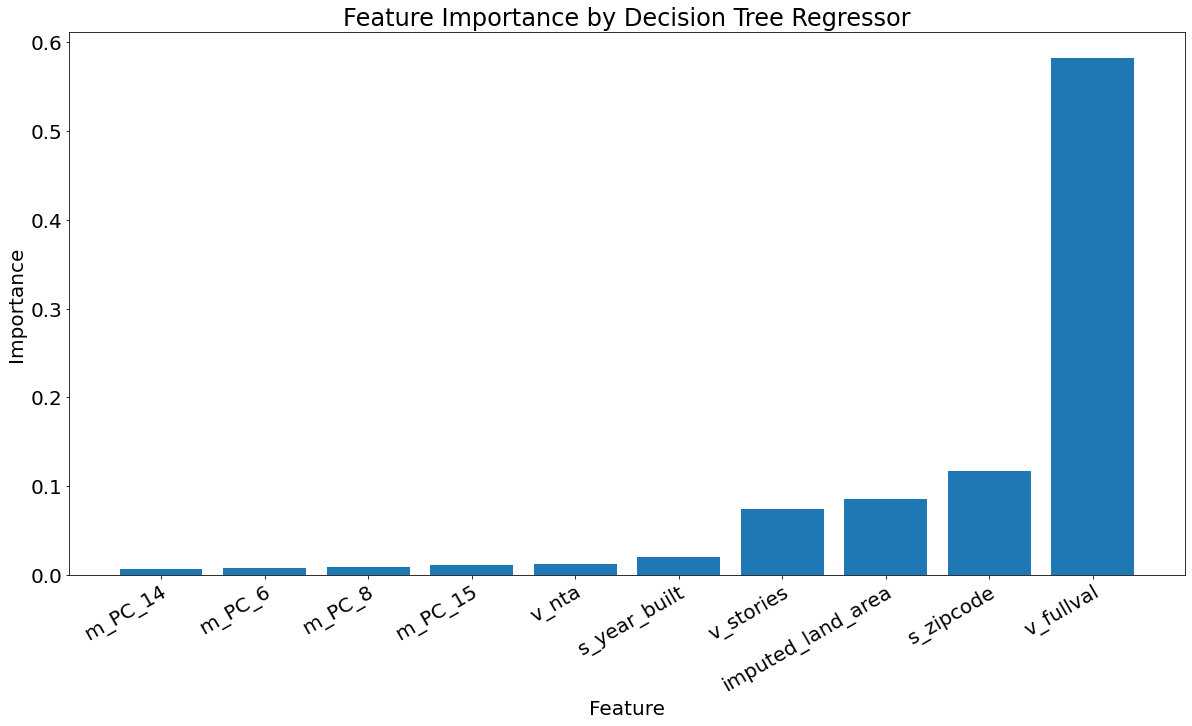

In [211]:
plt.figure(figsize=(20, 10))
plt.bar(sorted_df[-10:][0],sorted_df[-10:][1])
plt.xticks(np.arange(10), rotation=30, ha = "right", rotation_mode="anchor")
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance by Decision Tree Regressor')
plt.rcParams.update({'font.size': 20})
plt.show()

# Maybe a different Feature Selection Method

In [65]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

above = '../../../'
data = pd.read_pickle(above + 'post_eda.pkl')
data.drop(["s_total_units"], axis =1, inplace=True)
Y = data.loc[:, data.columns == 's_sale_price']
X = data.loc[:, data.columns != 's_sale_price']
scaler.fit(X)
scaled_data = scaler.transform(X)

In [87]:
from sklearn.feature_selection import SelectKBest, f_regression
select_k_best_classifier = SelectKBest(score_func=f_regression, k=50).fit(scaled_data, Y.values.ravel())
mask = select_k_best_classifier.get_support()
best_features_l = X.columns[mask].to_numpy()
best_features_l

array(['s_borough', 's_zipcode', 's_building_class_at_sale', 'v_stories',
       'v_fullval', 'd_9th_to_12th_grade_no_diploma_pct',
       'd_high_school_graduate_pct', 'd_some_college_no_degree_pct',
       'd_associates_degree_pct', 'd_bachelors_degree',
       'd_bachelors_degree_pct', 'd_graduate_or_professional_degree',
       'd_graduate_or_professional_degree_pct', 'd_white_population',
       'd_american_indian_and_alaska_native_population',
       'd_american_indian_and_alaska_native_population_pct',
       'd_total_housing_units', 'd_no_bedroom_units',
       'd_no_bedroom_units_pct', 'd_1_bedroom_units',
       'd_1_bedroom_units_pct', 'd_2_bedroom_units',
       'd_3_bedroom_units_pct', 'd_4_bedroom_units_pct',
       'd_5_bedroom_units_pct', 'd_units_from_100000_to_149999',
       'd_units_from_100000_to_149999_pct',
       'd_units_from_150000_to_199999',
       'd_units_from_150000_to_199999_pct',
       'd_units_from_200000_to_299999',
       'd_units_from_200000_to_299

In [89]:
# The elements in SelectKBest absent form the Decision tree Regressor:
in_l_ad = np.setdiff1d(best_features_l,best_features_d)
len(in_l_ad)

39

In [80]:
# The elements in Decision tree Regressor absent form SelectKBest:
in_d_al = np.setdiff1d(best_features_d,best_features_l)

In [90]:
# These are the matching features
matching = np.setdiff1d(best_features_l, np.setdiff1d(best_features_l,best_features_d))
matching

array(['a_count', 'c_count', 'd_3_bedroom_units_pct',
       'd_9th_to_12th_grade_no_diploma_pct',
       'd_households_200000_or_more',
       'd_households_from_35000_to_49999_pct', 'd_total_households',
       's_building_class_at_sale', 's_zipcode', 'v_fullval', 'v_stories'],
      dtype=object)

In [91]:
combined = np.concatenate((matching,in_l_ad,in_d_al))
combined

array(['a_count', 'c_count', 'd_3_bedroom_units_pct',
       'd_9th_to_12th_grade_no_diploma_pct',
       'd_households_200000_or_more',
       'd_households_from_35000_to_49999_pct', 'd_total_households',
       's_building_class_at_sale', 's_zipcode', 'v_fullval', 'v_stories',
       'd_1_bedroom_units', 'd_1_bedroom_units_pct', 'd_2_bedroom_units',
       'd_4_bedroom_units_pct', 'd_5_bedroom_units_pct',
       'd_american_indian_and_alaska_native_population',
       'd_american_indian_and_alaska_native_population_pct',
       'd_associates_degree_pct', 'd_bachelors_degree',
       'd_bachelors_degree_pct', 'd_graduate_or_professional_degree',
       'd_graduate_or_professional_degree_pct',
       'd_high_school_graduate_pct', 'd_households_200000_or_more_pct',
       'd_households_from_10000_to_14999',
       'd_households_from_150000_to_199999',
       'd_households_from_25000_to_34999_pct',
       'd_households_from_50000_to_74999_pct',
       'd_households_from_75000_to_99999_pc

In [131]:
data[np.concatenate((best_features_d,np.array(["s_sale_price", 's_bbl'])))].to_pickle(above + 'd_decision.pkl')

In [107]:
data[np.concatenate((best_features_l,np.array(["s_sale_price"])))].to_pickle(above + 'd_selectKbest.pkl')